# [Datasets and Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

PyTorch tries to decouple data loading/handling from the model training code. PyTorch exposes two data primitives:
* `DataLoader`
* `DataSet`

PyTorch also comes with pre-loaded data sets: [images](https://pytorch.org/vision/stable/datasets.html), [text](https://pytorch.org/text/stable/datasets.html), [audio](https://pytorch.org/audio/stable/datasets.html)

## Loading a Dataset
Here we load the [Fashion-MNIST dataset](https://github.com/zalandoresearch/)

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data", # where the data is stored
    train=True, # train or test data set
    download=True, # download the data and stores it at `root`
    transform=ToTensor() # feature and label transformation
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## Iterating and Visualizing the Dataset

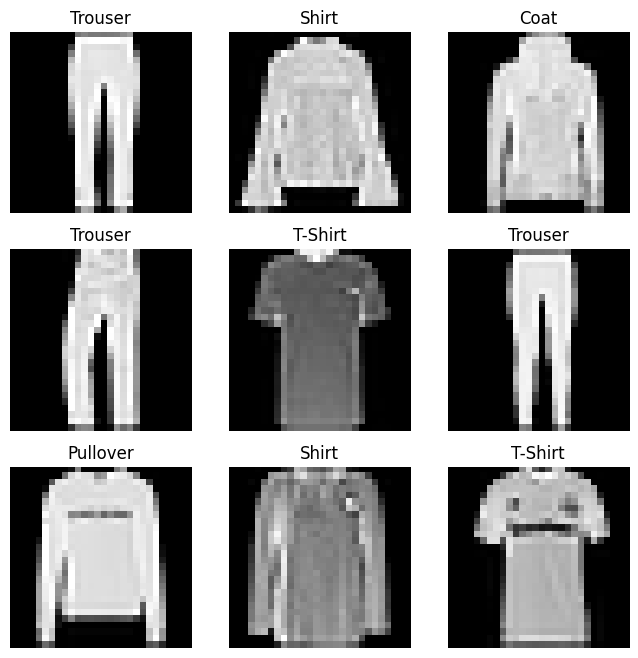

In [11]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Display eight random images from the dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows + 1):
    # Generate a random index into the training data
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    # Place the images on a rowsxcols grid, at position i
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    # Hide axis decorators
    plt.axis(False)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

A custom Dataset can be created by implementing the `Dataset` class.

## Preparing your data for training with Dataloaders

The `Dataset` retrieves our data one sample at a time.
If we want to rework the data (ex. shuffle, mini-batch) or speed things up (using `multiprocessing`), `DataLoader` can handle this for us.

In [13]:
from torch.utils.data import DataLoader

In [14]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

In [15]:
train_features, train_labels = next(iter(train_dataloader))
print("Feature batch shape: ", train_features.size())
print("Labels batch shape: ", train_labels.size())

Feature batch shape:  torch.Size([64, 1, 28, 28])
Labels batch shape:  torch.Size([64])


img <class 'torch.Tensor'>


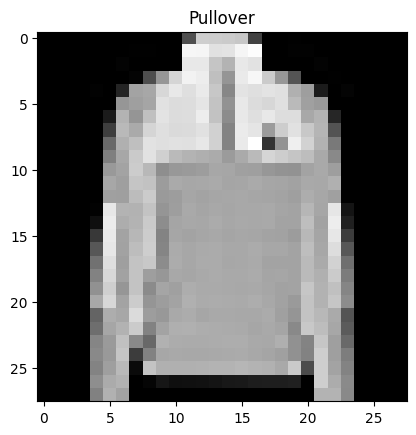

Label tensor(2)


In [22]:
# Display an image
# squeeze() removes dimensions in the input that has size 1
img_index = 8
img = train_features[img_index].squeeze()
print("img", type(img))
label = train_labels[img_index]
plt.imshow(img, cmap="gray")
plt.title(labels_map[label.item()])
plt.show()
print("Label", label)